In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from scipy import stats
matplotlib.rcParams['svg.fonttype'] = 'none'
matplotlib.rc('font', family='sans-serif')
matplotlib.rc('font', serif='Arial')
matplotlib.rc('text', usetex='false')
matplotlib.rc('pdf', fonttype=42)
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
cs_data = pd.read_csv('/home/james/Dropbox/Miller/data/Fluorescent_Enhancer/CS2del_fin_tail_eye.csv')
cs_data.tail()

GFP_data = cs_data.loc[:,['GFP_Fin','GFP_Tail','GFP_Eye','Clutch','CS_Gt','CS_Gt2']]
pd.Series('GFP', index=GFP_data.index)
GFP_data['Fluor'] = pd.Series('GFP', index=GFP_data.index)
GFP_data.columns = ['Fin', 'Tail', 'Eye', 'Clutch', 'CS_Gt','CS_Gt2', 'Fluor']

mCh_data = cs_data.loc[:,['mCh_Fin','mCh_Tail','mCh_Eye','Clutch','CS_Gt','CS_Gt2']]
mCh_data['Fluor'] = pd.Series('mCh', index=mCh_data.index)
mCh_data.columns = ['Fin', 'Tail', 'Eye', 'Clutch', 'CS_Gt','CS_Gt2', 'Fluor']
#mCh_data['Fin'] =mCh_data.loc[:,['Fin']] + .05
#mCh_data['Tail'] =mCh_data.loc[:,['Tail']] + .05
#mCh_data['Eye'] =mCh_data.loc[:,['Eye']] + .05
combined_fluor = pd.concat([GFP_data, mCh_data], axis=0)

#mCh_data['Fin']



combined_fluor.head


<bound method DataFrame.head of      Fin  Tail  Eye  Clutch    CS_Gt        CS_Gt2 Fluor
0    0.0   1.0  3.0  TG1364     delL          delL   GFP
1    1.0   1.0  3.0  TG1364     delL          delL   GFP
2    1.0   1.0  3.0  TG1364     delL          delL   GFP
3    2.0   0.0  3.0  TG1364     delL          delL   GFP
4    2.0   1.0  3.0  TG1364     delL          delL   GFP
5    0.0   1.0  3.0  TG1364     delL          delL   GFP
6    0.0   0.0  3.0  TG1364     delL          delL   GFP
7    1.0   1.0  3.0  TG1364     delL          delL   GFP
8    1.0   0.0  3.0  TG1364     delL          delL   GFP
9    0.0   1.0  3.0  TG1364     delL          delL   GFP
10   1.0   0.0  3.0  TG1364     delL          delL   GFP
11   1.0   0.0  2.0  TG1364     delL          delL   GFP
12   0.0   0.0  3.0  TG1364     delL          delL   GFP
13   1.0   0.0  3.0  TG1364     delL          delL   GFP
14   1.0   1.0  2.0  TG1364     delL          delL   GFP
15   1.0   0.0  3.0  TG1364     delL          delL   GFP

         Fin  Tail  Eye  Clutch  CS_Gt2  Fluor
CS_Gt                                         
WT        46    46   46      46      46     46
delL      27    27   27      27      27     27
delL175   56    56   56      56      56     56
delL198   22    22   22      22      22     22
delS      17    17   17      17      17     17


KeyError: 'delL175'

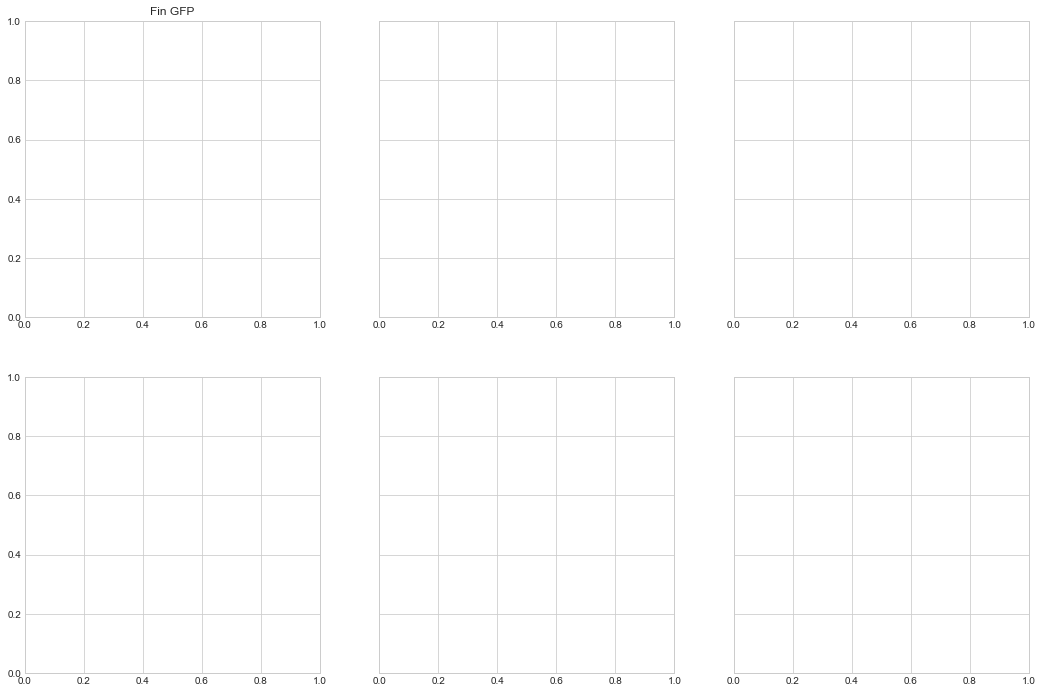

In [3]:
GFP_data = GFP_data[GFP_data['CS_Gt2'].isin(['WT_GFPonly','delL_GFPonly','delS_GFPonly','delL','WT','delS','delL175','delL198'])]
mCh_data = mCh_data[mCh_data['CS_Gt2'].isin(['WT_GFPonly','delL_GFPonly','delS_GFPonly','delL','WT','delS','delL175','delL198'])]

counts = GFP_data.groupby(['CS_Gt']).count()
mCh_counts = mCh_data.groupby(['CS_Gt']).count()
print counts
##count GFP percent
fin_clutch_count_group = GFP_data.groupby(['CS_Gt','Fin'])
fin_clutch_count_data = []
for key,df in fin_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Fin']
    fin_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
fin_clutch_count_data =  pd.DataFrame(fin_clutch_count_data)

tail_clutch_count_group = GFP_data.groupby(['CS_Gt','Tail'])
tail_clutch_count_data = []
for key,df in tail_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Tail']
    tail_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
tail_clutch_count_data =  pd.DataFrame(tail_clutch_count_data)

eye_clutch_count_group = GFP_data.groupby(['CS_Gt','Eye'])
eye_clutch_count_data = []
for key,df in eye_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Eye']
    eye_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
eye_clutch_count_data =  pd.DataFrame(eye_clutch_count_data)

##repeat for mCh
mCh_fin_clutch_count_group = mCh_data.groupby(['CS_Gt','Fin'])
mCh_fin_clutch_count_data = []
for key,df in mCh_fin_clutch_count_group:
    #print key
    proportion =  float(len(df))/mCh_counts.loc[key[0],'Fin']
    mCh_fin_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
mCh_fin_clutch_count_data =  pd.DataFrame(mCh_fin_clutch_count_data)

mCh_tail_clutch_count_group = mCh_data.groupby(['CS_Gt','Tail'])
mCh_tail_clutch_count_data = []
for key,df in mCh_tail_clutch_count_group:
    #print key
    proportion =  float(len(df))/mCh_counts.loc[key[0],'Tail']
    mCh_tail_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
mCh_tail_clutch_count_data =  pd.DataFrame(mCh_tail_clutch_count_data)

mCh_eye_clutch_count_group = mCh_data.groupby(['CS_Gt','Eye'])
mCh_eye_clutch_count_data = []
for key,df in mCh_eye_clutch_count_group:
    #print key
    proportion =  float(len(df))/mCh_counts.loc[key[0],'Eye']
    mCh_eye_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
mCh_eye_clutch_count_data =  pd.DataFrame(mCh_eye_clutch_count_data)
#print GFP_data.groupby('Clutch').apply(lambda x: x['Fin'] / x['tested_fish'])


gt_palette = {
    'WT_GFPonly' : 'blue',
    'WT' : 'skyblue',
    'delL_GFPonly' : 'red',
    'delL' : 'orange',
    'delS_GFPonly' : 'green',
    'delS' : 'lightgreen'
}

f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18, 12),sharey='row')
ax1.set_title('Fin GFP')
ax1.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=fin_clutch_count_data,ax=ax1,palette = gt_palette) 


ax2.set_title('tail GFP')
ax2.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=tail_clutch_count_data,ax=ax2,palette = gt_palette) 


ax3.set_title('Eye GFP')
ax3.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=eye_clutch_count_data,ax=ax3,palette = gt_palette) 


ax4.set_title('Fin mCh')
ax4.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=mCh_fin_clutch_count_data,ax=ax4,palette = gt_palette) 


ax5.set_title('tail mCh')
ax5.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=mCh_tail_clutch_count_data,ax=ax5,palette = gt_palette) 


ax6.set_title('Eye mCh')
ax6.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=mCh_eye_clutch_count_data,ax=ax6,palette = gt_palette) 


In [31]:
GFP_data = GFP_data[GFP_data['CS_Gt2'].isin(['WT_GFPonly','delL_GFPonly','delS_GFPonly','delL198'])]


GFP_data.head

<bound method DataFrame.head of      Fin  Tail  Eye  Clutch    CS_Gt        CS_Gt2 Fluor
59     0     0    3  TG1369  delL175  delL_GFPonly   GFP
60     0     0    3  TG1369  delL175  delL_GFPonly   GFP
61     0     0    3  TG1369  delL175  delL_GFPonly   GFP
62     0     0    3  TG1369  delL175  delL_GFPonly   GFP
63     0     0    3  TG1369  delL175  delL_GFPonly   GFP
64     0     0    3  TG1369  delL175  delL_GFPonly   GFP
65     0     0    3  TG1369  delL175  delL_GFPonly   GFP
66     0     0    3  TG1369  delL175  delL_GFPonly   GFP
67     0     0    3  TG1369  delL175  delL_GFPonly   GFP
68     0     0    3  TG1369  delL175  delL_GFPonly   GFP
69     0     0    3  TG1369  delL175  delL_GFPonly   GFP
70     0     0    3  TG1369  delL175  delL_GFPonly   GFP
71     0     0    3  TG1369  delL175  delL_GFPonly   GFP
72     0     0    3  TG1369  delL175  delL_GFPonly   GFP
73     0     0    3  TG1369  delL175  delL_GFPonly   GFP
74     0     0    3  TG1369  delL175  delL_GFPonly   GFP

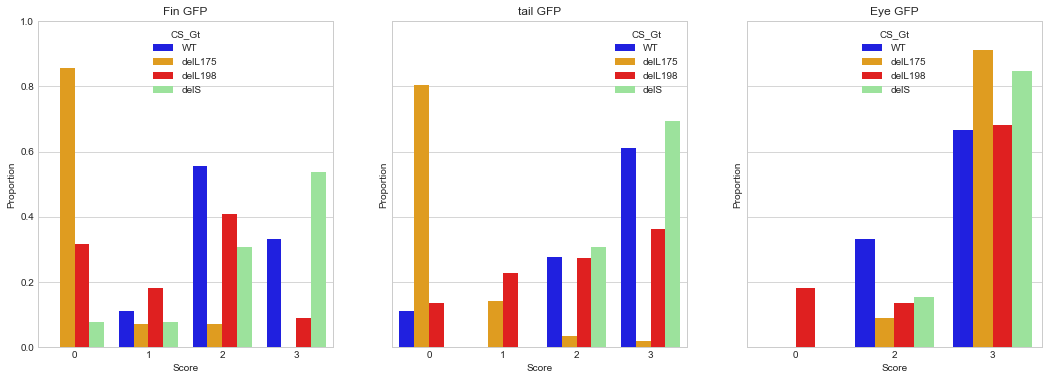

In [32]:
GFP_data = GFP_data[GFP_data['CS_Gt2'].isin(['WT_GFPonly','delL_GFPonly','delS_GFPonly','delL198'])]


counts = GFP_data.groupby(['CS_Gt']).count()

gt_palette = {
    'WT_GFPonly' : 'blue',
    'WT' : 'skyblue',
    'delL_GFPonly' : 'red',
    'delL' : 'orange',
    'delS_GFPonly' : 'green',
    'delS' : 'lightgreen'
}

gt_palette = {
    'WT' : 'blue',
    'delL175' : 'orange',
    'delL198' : 'red',
    'delS' : 'lightgreen'
}

fin_clutch_count_group = GFP_data.groupby(['CS_Gt','Fin'])
fin_clutch_count_data = []
for key,df in fin_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Fin']
    fin_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
fin_clutch_count_data =  pd.DataFrame(fin_clutch_count_data)

tail_clutch_count_group = GFP_data.groupby(['CS_Gt','Tail'])
tail_clutch_count_data = []
for key,df in tail_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Tail']
    tail_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
tail_clutch_count_data =  pd.DataFrame(tail_clutch_count_data)

eye_clutch_count_group = GFP_data.groupby(['CS_Gt','Eye'])
eye_clutch_count_data = []
for key,df in eye_clutch_count_group:
    #print key
    proportion =  float(len(df))/counts.loc[key[0],'Eye']
    eye_clutch_count_data.append({'CS_Gt': key[0], 'Score': key[1], 'Proportion':proportion})
eye_clutch_count_data =  pd.DataFrame(eye_clutch_count_data)
#print GFP_data.groupby('Clutch').apply(lambda x: x['Fin'] / x['tested_fish'])


f, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(18, 6),sharey=True)
ax1.set_title('Fin GFP')
ax1.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=fin_clutch_count_data,ax=ax1,palette = gt_palette) 


ax2.set_title('tail GFP')
ax2.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=tail_clutch_count_data,ax=ax2,palette = gt_palette) 


ax3.set_title('Eye GFP')
ax3.set_ylim([0,1])
sns.barplot(x='Score',y='Proportion',hue='CS_Gt',data=eye_clutch_count_data,ax=ax3,palette = gt_palette) 

plt.savefig('/home/james/Dropbox/Miller/figures/Multipop_intron4/CS2_large_small_del.pdf')


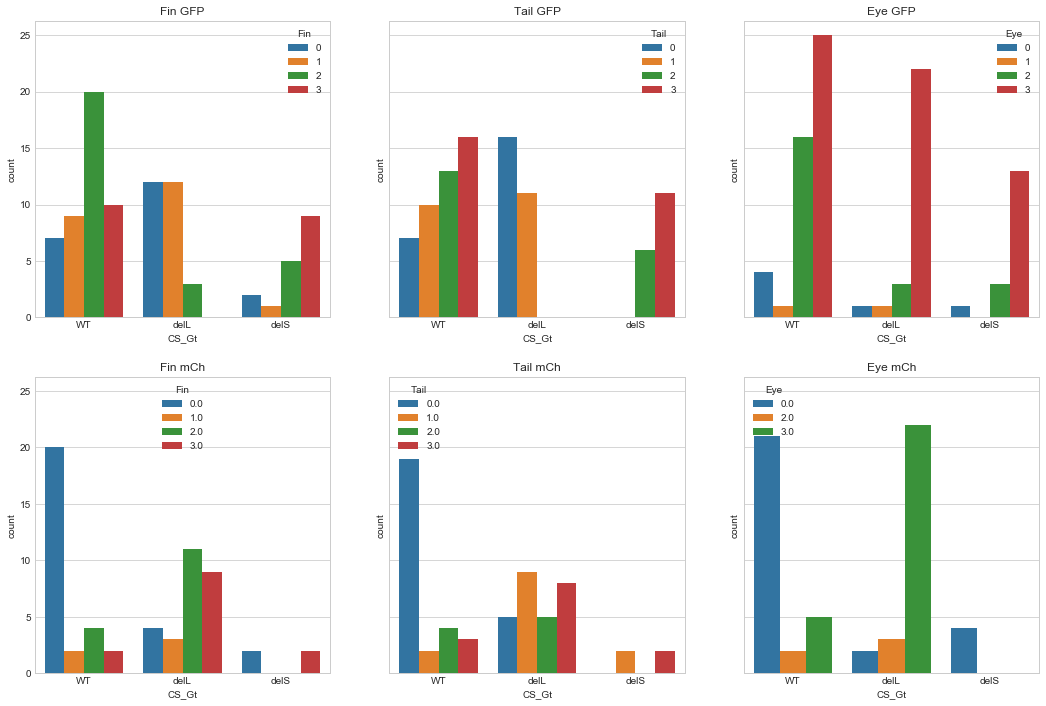

In [20]:
'''f, ax = plt.subplots(figsize=(6, 6))
sns.swarmplot(x="CS_Gt",y='mCh_Fin', data=cs_data,color='red')
sns.swarmplot(x="CS_Gt",y='GFP_Fin', data=cs_data,color='green')

sns.boxplot(x="CS_Gt",y='mCh_Fin', data=cs_data,color='red')
sns.boxplot(x="CS_Gt",y='GFP_Fin', data=cs_data,color='green')
'''
##sets the boxplots at indices to be white
def set_white_face(axis,ind,color='white'):
    
    for i in ind:
        cur_box = axis.artists[i]
        cur_box.set_facecolor(color)

        
        
        
'''   
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Fin GFP')
sns.countplot(x="CS_Gt",hue='Fin', data=GFP_data,order=['WT','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Tail GFP')
sns.countplot(x="CS_Gt",hue='Tail', data=GFP_data,order=['WT','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Eye GFP')
sns.countplot(x="CS_Gt",hue='Eye', data=GFP_data,order=['WT','delL_GFPonly'])
        
        
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Fin GFP')
sns.countplot(x="CS_Gt",hue='Fin', data=GFP_data,order=['WT','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Tail GFP')
sns.countplot(x="CS_Gt",hue='Tail', data=GFP_data,order=['WT','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Eye GFP')
sns.countplot(x="CS_Gt",hue='Eye', data=GFP_data,order=['WT','delL','delL_GFPonly'])

f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Fin mCh')
sns.countplot(x="CS_Gt",hue='Fin', data=mCh_data,order=['WT','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Tail mCh')
sns.countplot(x="CS_Gt",hue='Tail', data=mCh_data,order=['WT','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Eye mCh')
sns.countplot(x="CS_Gt",hue='Eye', data=mCh_data,order=['WT','delL','delL_GFPonly'])


f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Fin mCh')
sns.countplot(x="CS_Gt",hue='Fin', data=mCh_data,order=['WT','delS','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Tail mCh')
sns.countplot(x="CS_Gt",hue='Tail', data=mCh_data,order=['WT','delS','delL','delL_GFPonly'])
f, ax = plt.subplots(figsize=(6, 6))

sns.swarmplot(x="CS_Gt",y='Fin',hue='Fluor', data=combined_fluor)
#sns.countplot(x="Clutch",y='Fin',hue='Fluor', data=combined_fluor,palette=['green','red'])
ax = sns.boxplot(x="Clutch",y='Fin',hue='Fluor', data=combined_fluor,palette=['green','red'])
set_white_face(ax,[0,1,2,3,4,5])
set_white_face(ax,[0,1,2,3,4,5])
'''
f, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(18, 12),sharey=True)
ax1.set_title('Fin GFP')
sns.countplot(x="CS_Gt",hue='Fin', data=GFP_data,order=['WT','delL','delS'],ax=ax1)
ax2.set_title('Tail GFP')
sns.countplot(x="CS_Gt",hue='Tail', data=GFP_data,order=['WT','delL','delS'],ax=ax2)
ax3.set_title('Eye GFP')
sns.countplot(x="CS_Gt",hue='Eye', data=GFP_data,order=['WT','delL','delS'],ax=ax3)
ax4.set_title('Fin mCh')
sns.countplot(x="CS_Gt",hue='Fin', data=mCh_data,order=['WT','delL','delS'],ax=ax4)
ax5.set_title('Tail mCh')
sns.countplot(x="CS_Gt",hue='Tail', data=mCh_data,order=['WT','delL','delS'],ax=ax5)
ax6.set_title('Eye mCh')
sns.countplot(x="CS_Gt",hue='Eye', data=mCh_data,order=['WT','delL','delS'],ax=ax6)
